<a href="https://colab.research.google.com/github/EdwardWendling/Ativos-x-SELIC/blob/main/C%C3%B3pia_de_Desafio_4_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFIO 4: CONSTRUINDO UM MODELO DE REGRESSÃO PARA MARKETING**


O objetivo deste projeto foi construir um modelo de regressão linear simples para prever as vendas de uma empresa com base nos investimentos em publicidade em diferentes canais YouTube, Facebook e newspaper. O trabalho foi dividido em quatro etapas principais: Análise Descritiva, Análise Exploratória, Modelagem e Cálculo de predição.


In [ ]:
import pandas as pd


In [ ]:
# Carregar o dataset para análise

df = pd.read_csv('/MKT.csv')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Verificar os nomes das colunas no dataframe
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

**Etapa 01: Análise Descritiva**

Nessa fase, iremos explorar o arquivo para entender melhor suas variáveis. Utilizaremos a biblioteca Pandas para manipulação dos dados e as bibliotecas de visualização Seaborn e Matplotlib para analisar o tipo de dados, se há valores ausentes, a média, o desvio padrão, valores mínimos e máximos. Será criado gráficos para analisar a variabilidade dos investimentos em publicidade e das vendas.


In [ ]:
# Informações gerais sobre o dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Estatísticas descritivas

df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


O valor médio de investimento em YouTube é 178,02, enquanto o desvio padrão é 102,45, sugerindo uma grande variabilidade nos gastos.

No Facebook, o valor médio é 27,67, com um desvio padrão de 17,91, mostrando uma menor dispersão comparada ao YouTube.

Newspaper tem média de 35,24 e desvio padrão de 24,90, também com uma alta variabilidade.

As vendas (sales) têm uma média de 16,92 e desvio padrão de 6,31, variando de 1,92 a 32,40.

In [ ]:
# Verificação de valores ausentes

df.isnull().sum()

,0
youtube,0
facebook,0
newspaper,0
sales,0


**CONCLUSÃO:** As variáveis apresentaram uma grande dispersão, especialmente os investimentos no YouTube e em Newspaper. As vendas, em sua maioria, concentraram-se em valores intermediários.

**Etapa 02: Análise Exploratória**

Nesta etapa, buscaremos identificar relações entre as variáveis e padrões relevantes no arquivo, realizando, cálculo da matriz de correlação para verificar a relação entre os investimentos em publicidade e as vendas,
visualização da correlação através de um heatmap e gráficos de dispersão, detecção de outliers usando boxplots para verificar a presença de valores atípicos e verificação da normalidade dos dados através de histogramas.

In [ ]:
# importando bibliotecas seaborn e matplotlib para visualização dos dados

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Matriz de correlação
correlation_matrix = df.corr()

# Exibir a matriz de correlação
correlation_matrix

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


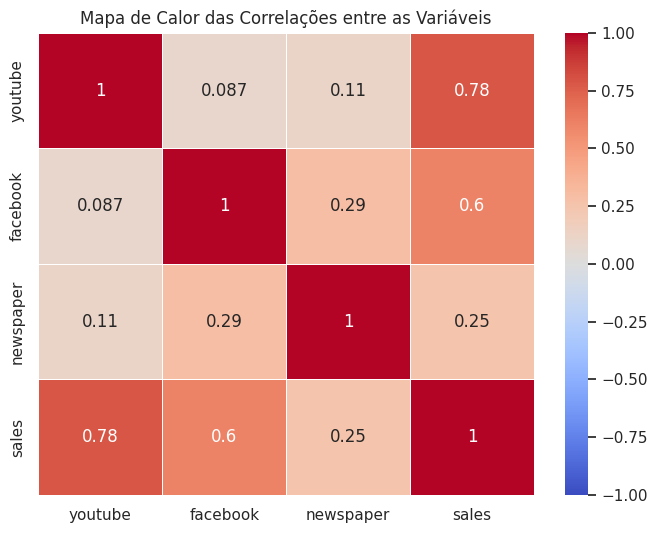

In [ ]:
# Visualização da correlação com um heatmap

# Configuração de estilo
sns.set(style="white")

# Criar um heatmap para a correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Mapa de Calor das Correlações entre as Variáveis')
plt.show()

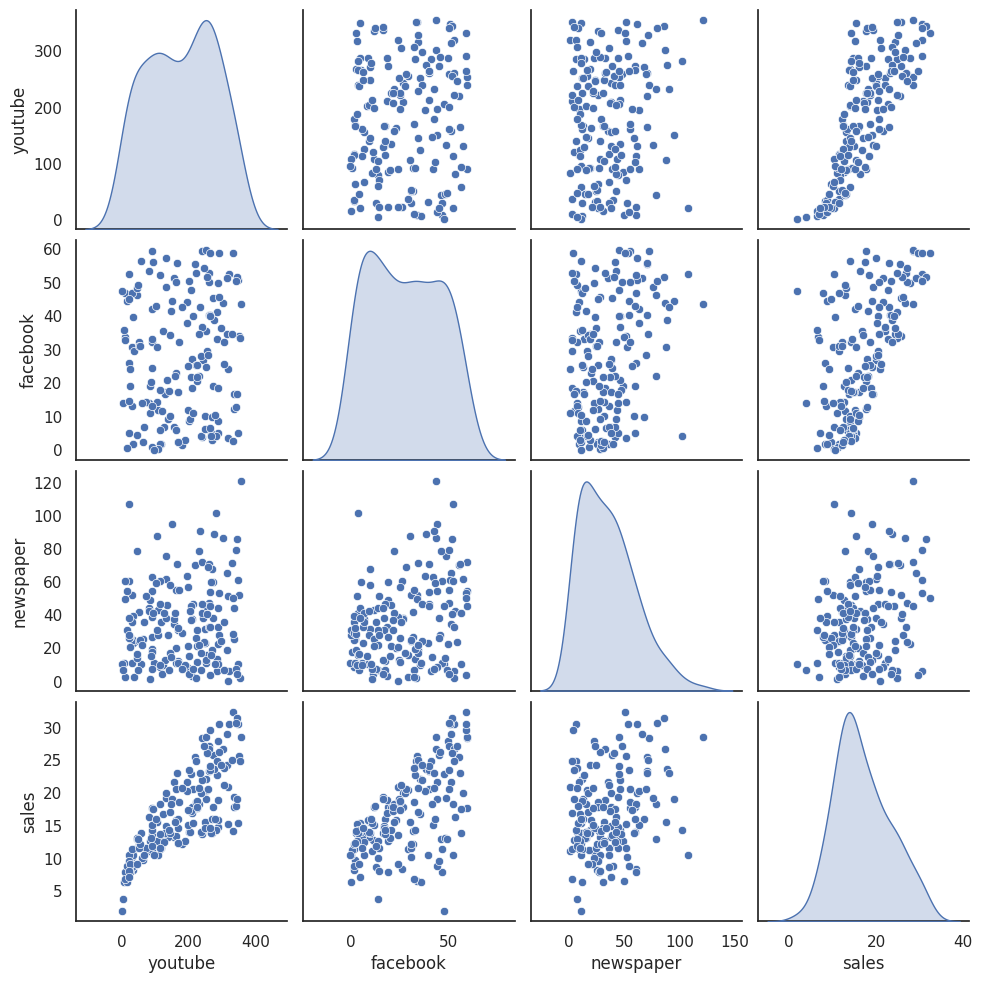

In [ ]:
# Gráficos de dispersão para identificar relações entre as variáveis

# Pares de variáveis para visualizar correlações
sns.pairplot(df, diag_kind='kde', kind='scatter')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


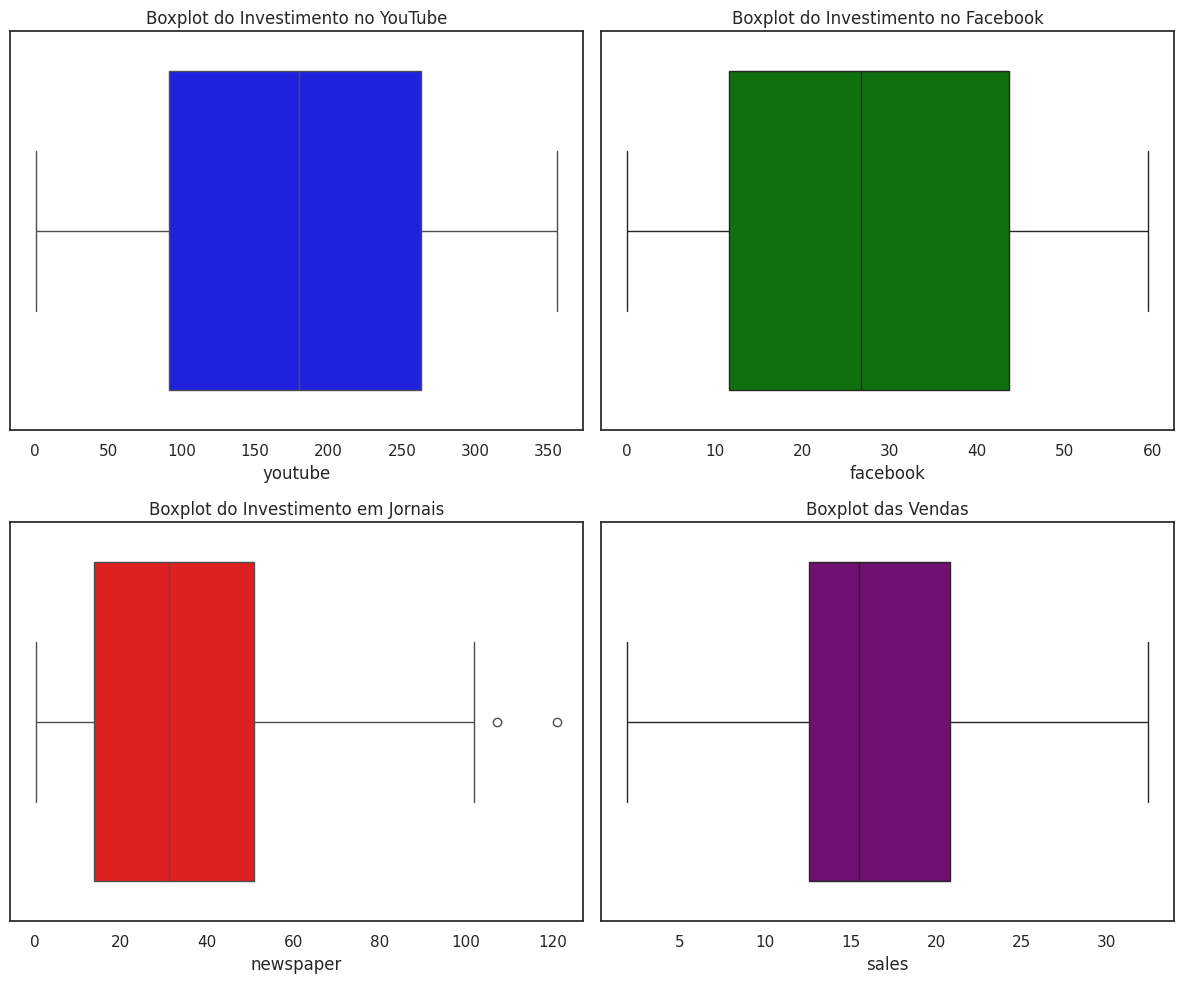

In [ ]:
# Verificação de outliers usando boxplots

# Criar boxplots para cada variável
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot para o YouTube
sns.boxplot(data=df, x='youtube', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Boxplot do Investimento no YouTube')

# Boxplot para o Facebook
sns.boxplot(data=df, x='facebook', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Boxplot do Investimento no Facebook')

# Boxplot para o Jornal
sns.boxplot(data=df, x='newspaper', ax=axes[1, 0], color='red')
axes[1, 0].set_title('Boxplot do Investimento em Jornais')

# Boxplot para as Vendas
sns.boxplot(data=df, x='sales', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Boxplot das Vendas')

plt.tight_layout()
plt.show()

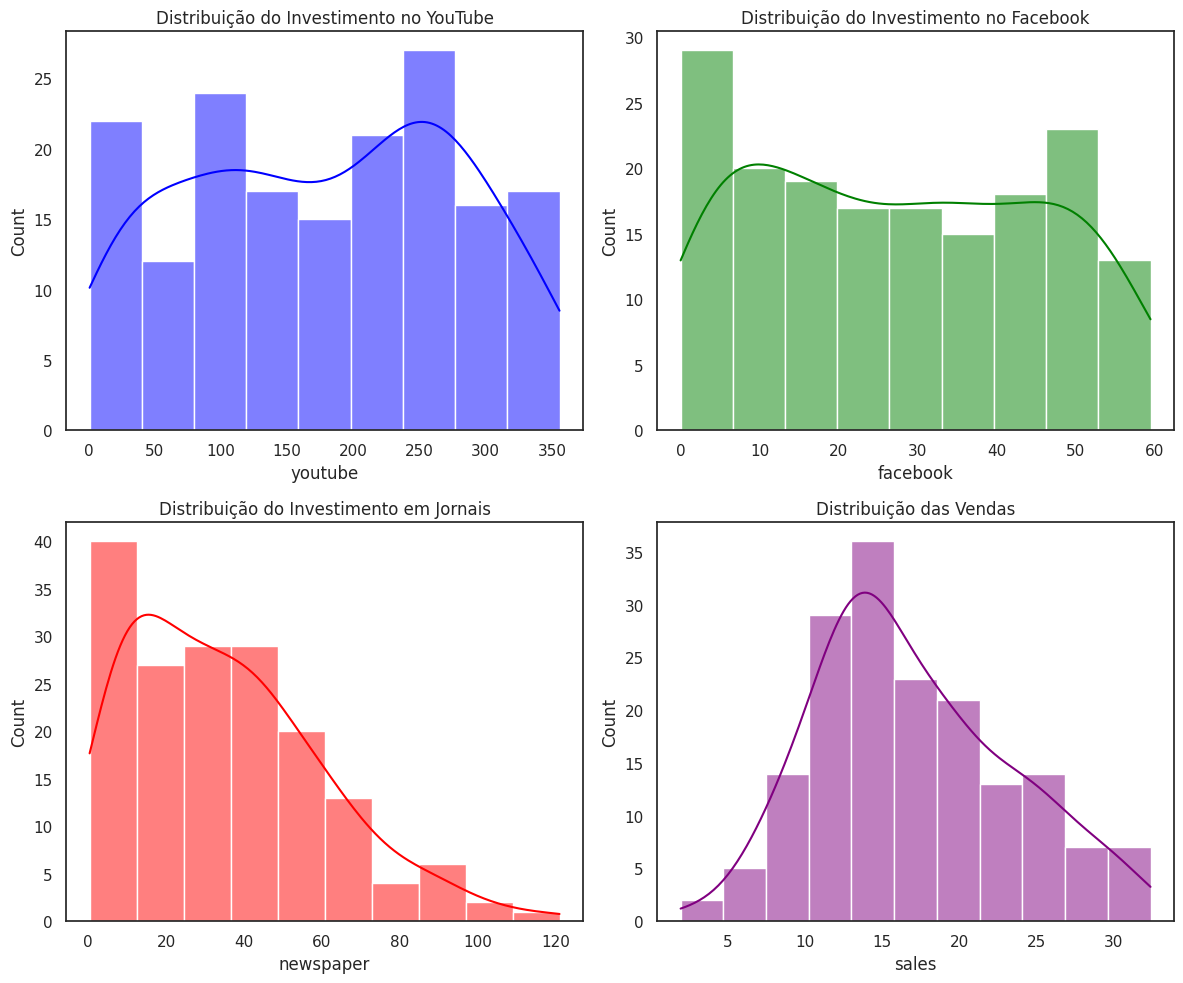

In [ ]:
# Verificação da normalidade

# Histograma com curva de densidade para verificar a normalidade
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# YouTube
sns.histplot(df['youtube'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribuição do Investimento no YouTube')

# Facebook
sns.histplot(df['facebook'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribuição do Investimento no Facebook')

# Jornal
sns.histplot(df['newspaper'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Distribuição do Investimento em Jornais')

# Vendas
sns.histplot(df['sales'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Distribuição das Vendas')

plt.tight_layout()
plt.show()

**Conclusão:** Identificamos correlações positivas entre os investimentos e as vendas, especialmente em YouTube e Facebook. Além disso, notamos alguns outliers em certas variáveis, como investimentos em Newspaper.

**Etapa 03: Modelagem**

Será desenvolvido um modelo de regressão linear simples para prever as vendas com base nos investimentos em publicidade. Utilizaremos o scikit-learn para construir e avaliar o modelo. Haverá a separação das variáveis independentes (investimentos) e dependentes (vendas), divisão dos dados em treino (80%) e teste (20%), treinamento do modelo de regressão linear com os dados de treino e do coeficiente de determinação (R²).

In [ ]:
# importando a biblioteca scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Separar as variáveis independentes e dependentes

# Variáveis independentes (investimentos em publicidade)
X = df[['youtube', 'facebook', 'newspaper']]

# Variável dependente (vendas)
y = df['sales']

In [ ]:
# Dividir os dados em conjuntos de treino (80%) e teste (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar o modelo de regressão linear

model = LinearRegression()

In [ ]:
# Treinando o modelo nos dados de treino

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Fazer previsões com os dados de teste

y_pred = model.predict(X_test)

In [ ]:
# Avaliar o desempenho do modelo

r2 = r2_score(y_test, y_pred)  # Coeficiente de determinação R²

r2

0.872863085701216

In [ ]:
# Exibir os coeficientes do modelo

coeficientes = model.coef_
intercepto = model.intercept_

coeficientes, intercepto

(array([ 4.41858407e-02,  1.94481975e-01, -4.88341093e-05]),
 3.7030498901645927)

**Conclusão:** O modelo foi treinado e avaliado com bom desempenho, mostrando que as variáveis de investimento têm impacto significativo nas vendas.

**Etapa 04: Predição**

Aplicaremos o modelo treinado para prever as vendas com base em novos valores de investimento. Simularemos diferentes níveis de investimento em YouTube, Facebook e jornais para prever o retorno esperado em vendas.

In [ ]:
# Exemplo de novos valores de investimento em publicidade

# (valores podem ser ajustados conforme necessário)
novo_investimento = pd.DataFrame({
    'youtube': [100, 200, 300],      # Investimento em YouTube
    'facebook': [25, 50, 75],        # Investimento em Facebook
    'newspaper': [10, 20, 30]        # Investimento em Jornal
})

In [ ]:
# Fazer previsões com os novos valores de investimento
previsoes_vendas = model.predict(novo_investimento)

# Exibir as previsões
previsoes_vendas

array([12.983195  , 22.26334012, 31.54348523])

In [ ]:
# Mostrar os resultados das previsões
resultado_previsoes = pd.DataFrame({
    'Investimento YouTube': novo_investimento['youtube'],
    'Investimento Facebook': novo_investimento['facebook'],
    'Investimento Jornal': novo_investimento['newspaper'],
    'Previsão de Vendas': previsoes_vendas
})

resultado_previsoes

,Investimento YouTube,Investimento Facebook,Investimento Jornal,Previsão de Vendas
0,100,25,10,12.983195
1,200,50,20,22.263340
2,300,75,30,31.543485


**Conclusão:** As previsões forneceram uma visão clara do impacto que os diferentes níveis de investimento podem ter nas vendas, ajudando a empresa a tomar decisões estratégicas sobre alocação de recursos em publicidade.